# Excercise 2a: Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("ex2_train.csv")
y_train = pd.read_csv("ex2_class_train.csv")
data = X_train.copy()
data['Survived'] = y_train

In [3]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,"Partner, Mr. Austen",male,45.5,0,0,28.5000,S,0
1,2,"Berriman, Mr. William John",male,23.0,0,0,13.0000,S,0
2,3,"Tikkanen, Mr. Juho",male,32.0,0,0,7.9250,S,0
3,3,"Hansen, Mr. Henrik Juul",male,26.0,1,0,7.8542,S,0
4,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,31.2750,S,0


This is a widely used dataset that contains information on the passengers who were aboard the Titanic when it sank on its maiden voyage in 1912. We will use it for a supervised learning exercise (ex2b) to predict whether a passenger can survive based on his or her attributes. Before constructing the classifier, you need to do some guided exploratory data analysis in ex2a.

The column meanings are: 
* Survived: Survival status (0 = No, 1 = Yes).
* Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).
* Name: Name of the passenger.
* Sex: Gender of the passenger (male/female).
* Age: Age of the passenger in years.
* SibSp: Number of siblings/spouses aboard the Titanic.
* Parch: Number of parents/children aboard the Titanic.
* Fare: Passenger fare.
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

**TODO: Please answer the following questions by using suitable analysis tools, e.g. statistics or visualizations.** To pass the exercise, you need to correctly answer three or more of Questions 1 to 5. A correct answer includes a correct statement and the analysis result that support the statement.

# Example Question: Is gender related to survival rate?

Answer: Yes, females had a higher survival rate.

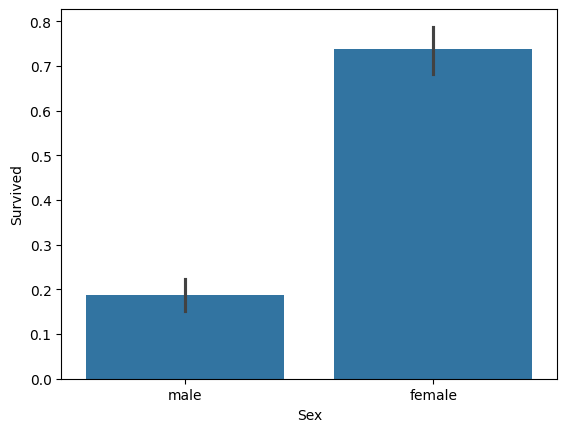

In [4]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Sex', y='Survived', data=data)
plt.show()

# Question 1: Did first-class passengers survive more?

Answer: Yes, first-class passengers had a higher survival rate.

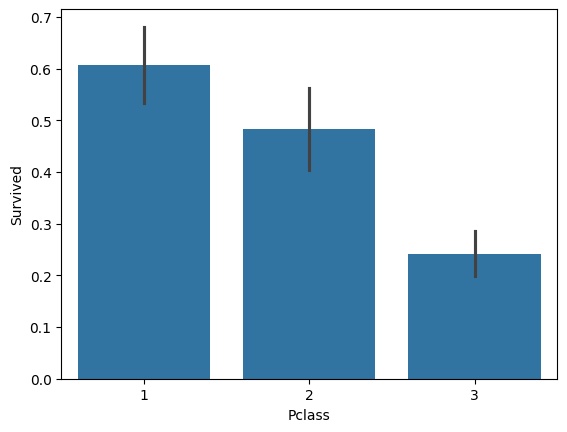

In [5]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Pclass', y='Survived', data=data)
plt.show()

# Question 2: Is survival related to Embarked?

Answer: Yes, passengers who embarked from Cherbourg had a higher survival rate.

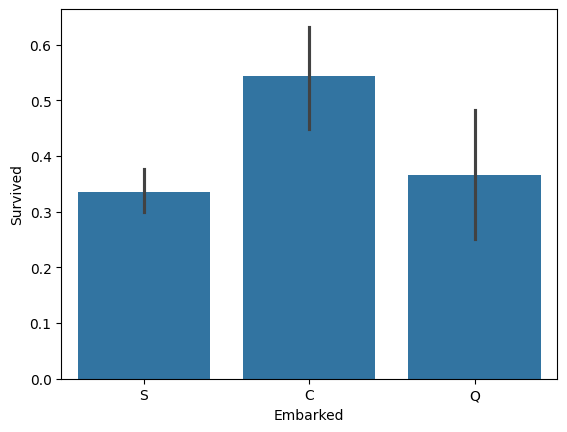

In [6]:
# Show the relevant statistics or visualization(s) to support your answer
sns.barplot(x='Embarked', y='Survived', data=data)
plt.show()

# Question 3: How is age related to survival?

Answer: The survival rate is higher for young children, and lower for teenagers and adults. Because of one outlier, the survival rate for the oldest passengers is higher, but this is not a general trend.

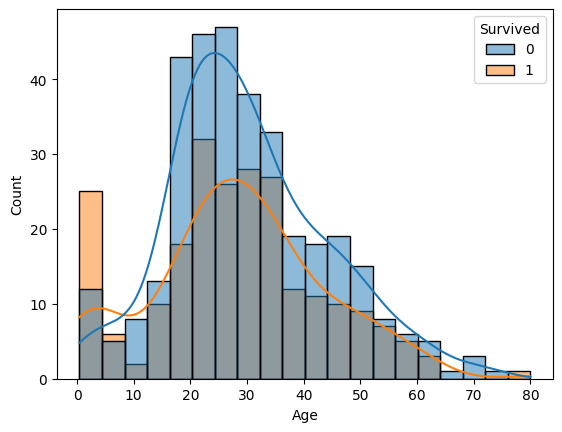

In [7]:
# Show the relevant statistics or visualization(s) to support your answer
sns.histplot(data=data, x='Age', hue='Survived', kde=True)
plt.show()

# Question 4: Does family size somehow affect the survival rate?

Answer: Larger families (5+) had lower survival rates, while small families (2-4) had higher survival rates. Single passengers had an intermediate survival rate.

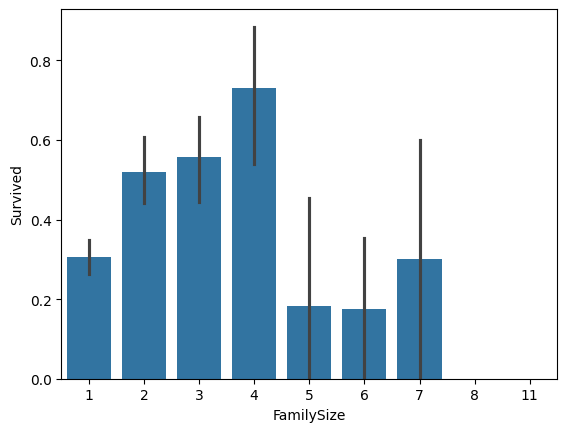

In [8]:
# Show the relevant statistics or visualization(s) to support your answer
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
sns.barplot(x='FamilySize', y='Survived', data=data)
plt.show()

# Question 5: Some passengers with certain titles seemed to have more chance to survive. Is that true?

Answer: We see that if you had a title related to being a woman (Miss, Mrs, Mme, Ms, Lady, Mlle, Countess), you had a higher chance of survival, especially if it is a noble title (Lady, Countess). If you had a title related to being a man, you had a lower chance of survival.

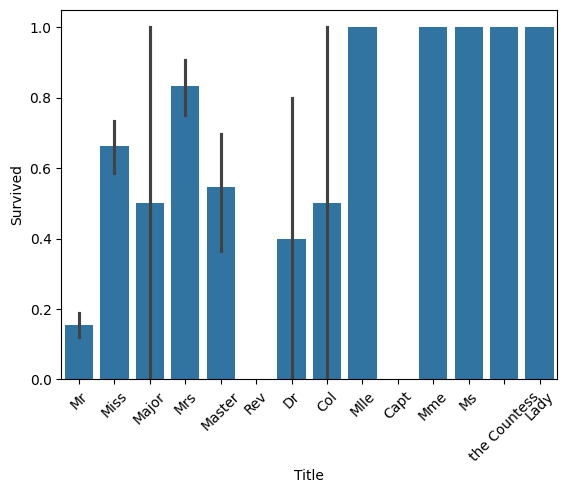

In [9]:
# Show the relevant statistics or visualization(s) to support your answer
data['Title'] = data['Name'].str.split(', ').str[1].str.split('.').str[0]
sns.barplot(x='Title', y='Survived', data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()